# Project Goal; Document Clustering System with K Means

## **Introduction:**


**Why K Means Clustering?**

Given text documents, we can group them automatically: text clustering. We’ll use KMeans which is an unsupervised machine learning algorithm.

I’ve collected some text data from **Wikipedia** as the task description doesn't restrict us to a data source. Our algorithm will create clusters, yes the clustering algorithm will create clusters automatically. Nice predictions.


Imprort/Install **standard dependecies** and libraries -usually for Text Analytics/NLP Processing.


In [1]:

import nltk
import os.path
import numpy as np
import pandas as pd
import nltk
import glob
import re
import os
from bs4 import BeautifulSoup
from sklearn import feature_extraction
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")


**Data Extraction Process**

The content of each Wikipedia article is stored wiki_list while the title of each article is stored in variable title.

In other words, We create the documents using a Python list.


**How and how many input documents are collected?** We have data from one corpus (wiki) from **20 articles**.

Download content from wikipedia

In [2]:
!pip install wikipedia #First wikipedia library must be installed

  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11696 sha256=0abaafaed0ef63250f929f649a09ce60e8358ce3f635a1415849723c8535fe89
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


In [3]:
!pip install scispacy #Python package containing spaCy models for processing biomedical, scientific or clinical text.
import scispacy
import spacy
from spacy import displacy
from collections import Counter,OrderedDict #Collections module provides us with specialized container datatypes

     |████████████████████████████████| 44 kB 1.7 MB/s 
     |████████████████████████████████| 71 kB 10.4 MB/s 
     |████████████████████████████████| 13.5 MB 19.6 MB/s 
     |████████████████████████████████| 6.3 MB 13.1 MB/s 
     |████████████████████████████████| 188 kB 61.6 MB/s 
     |████████████████████████████████| 10.1 MB 28.8 MB/s 
     |████████████████████████████████| 628 kB 61.3 MB/s 
     |████████████████████████████████| 451 kB 72.3 MB/s 
     |████████████████████████████████| 42 kB 1.9 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstal

In [4]:
import pandas as pd
import wikipedia
articles=['Sports','Business','Mathematics','Data Science','Artificial intelligence', 'Agriculture','University','Technology'
          'European Central Bank','Commerce','Financial technology','International Monetary Fund','Medicine','Doctor','Geography','American Football', 'Dance'
          'Basketball','Swimming','Football']
wiki_lst=[] #my data list
title=[] #creating a title list as the titles will have there individual documents.
for article in articles:
    print("loading content: ",article)
    wiki_lst.append(wikipedia.page(article).content)
    title.append(article)  #I appended the title and the article contents
print("examine content")
wiki_lst

loading content:  Sports
loading content:  Business
loading content:  Mathematics
loading content:  Data Science
loading content:  Artificial intelligence
loading content:  Agriculture
loading content:  University
loading content:  TechnologyEuropean Central Bank
loading content:  Commerce
loading content:  Financial technology
loading content:  International Monetary Fund
loading content:  Medicine
loading content:  Doctor
loading content:  Geography
loading content:  American Football
loading content:  DanceBasketball
loading content:  Swimming
loading content:  Football
examine content


['Sport pertains to any form of competitive physical activity or game that aims to use, maintain or improve physical ability and skills while providing enjoyment to participants and, in some cases, entertainment to spectators. Sports can, through casual or organized participation, improve one\'s physical health. Hundreds of sports exist, from those between single contestants, through to those with hundreds of simultaneous participants, either in teams or competing as individuals. In certain sports such as racing, many contestants may compete, simultaneously or consecutively, with one winner; in others, the contest (a match) is between two sides, each attempting to exceed the other. Some sports allow a "tie" or "draw", in which there is no single winner; others provide tie-breaking methods to ensure one winner and one loser. A number of contests may be arranged in a tournament producing a champion. Many sports leagues make an annual champion by arranging games in a regular sports season

**Text Pre-processing** - TF-IDF

For cleaning (removing unwanted things like puntucations, white spaces etc) 

In [5]:
import nltk #text processing 
from nltk.tokenize import WhitespaceTokenizer

In [6]:
def clean_text(text):

  text = text.lower()

  # remove links
  text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
  # remove RT
  text = re.sub(r'rt[\s]+', '', text)
  # remove \n
  text = text.replace('\n', ' ')
  # remove user mentions
  text = re.sub(r'@[\w]*', '', text)
  # remove special characters
  text = re.sub('[^a-zA-Z0-9\s]', '', text)
  # remove punctuation
  text = re.sub('[.!,:;?]', '', text)
  # tokenize tweets
  text = WhitespaceTokenizer().tokenize(text)
  # remove stop word
  text = [w for w in text if not w in stopword_list]
  text = ' '.join(text)

  return text

**Text Vectorization** / **Feature Extraction**

Text Vectorization is the process of converting text into numerical representation,one good way our computer can understand.

KMeans works with **numbers only**, therefore, we need to have numbers. To get numbers, we do a common step known as feature extraction.

The feature we’ll use is TF-IDF, a numerical statistic. This statistic uses term frequency and inverse document frequency. 

The method TfidfVectorizer() implements the TF-IDF algorithm. Briefly, the method TfidfVectorizer converts a collection of raw documents to a matrix of TF-IDF features.

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(wiki_lst)

In [8]:
print(vectorizer.get_feature_names())
print(X.shape) #an insight unto the shape of my data (feautures)


['00', '000', '0001', '001', '0026', '003', '0030', '0036', '0040', '007', '00806', '0094', '01', '011', '011082', '012', '013', '019', '0190', '01900692', '0198', '02', '022133', '03', '03384', '04521', '0464', '0465065707', '048', '05', '05299', '05731', '05830', '06', '0692', '07', '0706', '08', '08153', '08275', '08813', '0893', '09', '09540090310001655110', '10', '100', '1002', '100450', '1007', '100k', '101', '1013298507114', '1016', '10168773', '1017', '1023', '1039480085', '1048', '105', '106', '1079', '1080', '1083694322', '1087', '108771', '1088', '1093', '10m', '10th', '11', '110', '1100', '1109', '1110727808', '11229402', '1124', '1126', '113', '1131', '114', '1145', '115', '1150', '1155', '11573548', '1158', '1162', '1165', '1167', '117', '11715509', '1174', '1183', '1197', '11th', '11v', '12', '120', '1202', '1219', '122', '1228', '123', '12400', '125', '1259433', '126', '127', '1276', '1280', '12th', '13', '1300', '1308', '1309', '1314', '1321', '1332', '133646', '135', 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


**Note:** Each row of **variable X** is a **vector representation** of a Wikipedia article. Hence, we can use **X as input** for the k-means algorithm.

In [9]:
print(X[0,])

  (0, 31)	0.007129180136347701
  (0, 652)	0.007129180136347701
  (0, 391)	0.0062401077387407786
  (0, 378)	0.005609300833809758
  (0, 10329)	0.003200349133664892
  (0, 2031)	0.003600129682947041
  (0, 10163)	0.007129180136347701
  (0, 12500)	0.0033911409231734803
  (0, 7847)	0.0024366092665763176
  (0, 3645)	0.005609300833809758
  (0, 5230)	0.004382218797972271
  (0, 11060)	0.007129180136347701
  (0, 8611)	0.0038311560385959134
  (0, 6522)	0.004382218797972271
  (0, 480)	0.0062401077387407786
  (0, 648)	0.0062401077387407786
  (0, 6422)	0.007200259365894082
  (0, 9199)	0.007129180136347701
  (0, 7158)	0.007129180136347701
  (0, 7448)	0.004089421531271814
  (0, 9400)	0.003600129682947041
  (0, 412)	0.003600129682947041
  (0, 8349)	0.0038311560385959134
  (0, 12334)	0.004382218797972271
  (0, 418)	0.0033911409231734803
  :	:
  (0, 10628)	0.03235787430481158
  (0, 6006)	0.2587412352375095
  (0, 8395)	0.08192014376775973
  (0, 4262)	0.014258360272695402
  (0, 9178)	0.004382218797972271
  (

## K Means Clustering Algorithm

An unsupervised learning in machine learning, **K-means algorithm partitions** n observations into k clusters where each observation belongs to the cluster with the nearest mean serving as a prototype of the cluster.


First, we must *decide on the number of clusters*. Here, we will use the **elbow method.** That is, am applying the elbow method for determing optimal value of k (clusters)

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### **Elbow Method**

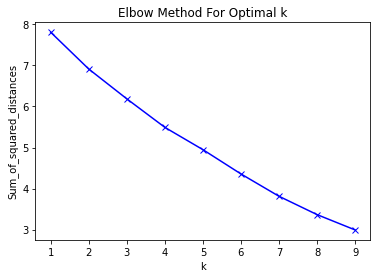

In [11]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

The plot is almost a straight line though not close, probably because we have to few articles. But at a closer examination a dent appears for k=3 or k=7. We will try to cluster into 7 groups.

Which document clustering method (e.g. K-means with appropriate K value) has been used and how its performance is measured?



In [12]:
true_k = 7
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))


                              title  cluster
7   TechnologyEuropean Central Bank        0
10      International Monetary Fund        0
0                            Sports        1
1                          Business        1
2                       Mathematics        1
5                       Agriculture        1
6                        University        1
16                         Swimming        1
13                        Geography        1
11                         Medicine        1
12                           Doctor        1
15                  DanceBasketball        2
14                American Football        2
17                         Football        2
4           Artificial intelligence        3
8                          Commerce        4
3                      Data Science        5
9              Financial technology        6


### Result/Performance Evaluation

A nice way is to create a word cloud from the articles of each cluster.

Cluster: 0
Titles
 TechnologyEuropean Central Bank
     International Monetary Fund


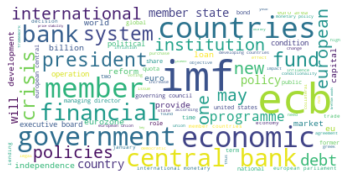

Cluster: 1
Titles
      Sports
    Business
 Mathematics
 Agriculture
  University
    Medicine
      Doctor
   Geography
    Swimming


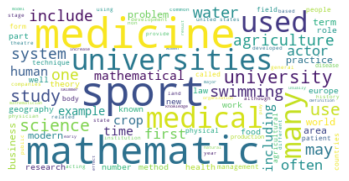

Cluster: 2
Titles
 American Football
   DanceBasketball
          Football


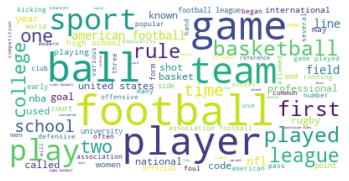

Cluster: 3
Titles
 Artificial intelligence


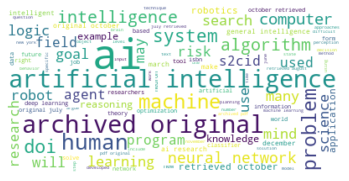

Cluster: 4
Titles
 Commerce


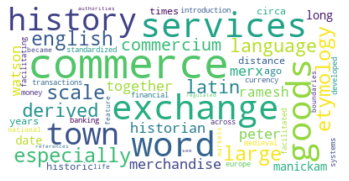

Cluster: 5
Titles
 Data Science


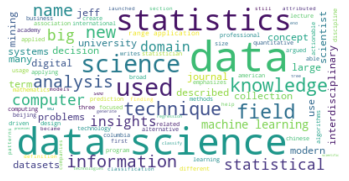

Cluster: 6
Titles
 Financial technology


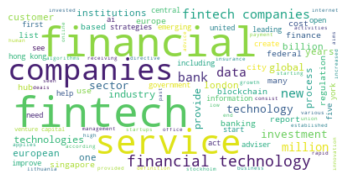

In [13]:
from wordcloud import WordCloud
result={'cluster':labels,'wiki':wiki_lst}
result=pd.DataFrame(result)
for k in range(0,true_k):
   s=result[result.cluster==k]
   text=s['wiki'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   print('Cluster: {}'.format(k))
   print('Titles')
   titles=wiki_cl[wiki_cl.cluster==k]['title']         
   print(titles.to_string(index=False))
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()

**Analysis:**

**Cluster 0:** Consists of articles in; 

                            Commerce

**Cluster 1:** Consists of articles in;  
                     Sports

                     Mathematics

                     Agriculture

                      University

           European Central Bank

     International Monetary Fund

                        Medicine

                          Doctor

                       Geography

                 DanceBasketball

                      Technology

and we can see for the others!


The most charasterisitic terms can be seen in the respone below

In [14]:
terms = vectorizer.get_feature_names()
feature_array = np.array(terms)
tfidf_sorting = np.argsort(X.toarray()).flatten()[::-1]
n = 100
top_n = feature_array[tfidf_sorting][:n]
print(top_n)


['football' 'the' 'of' 'in' 'ball' 'and' 'to' 'rugby' 'game' 'rules'
 'played' 'games' 'was' 'is' 'as' 'players' 'australian' 'by' 'codes'
 'school' 'at' 'association' 'league' 'for' 'from' 'were' 'with' 'it' 'or'
 'club' 'first' 'that' 'which' 'on' 'schools' 'soccer' 'an' 'had' 'code'
 'american' 'melbourne' 'playing' 'england' 'kicking' 'between' 'sport'
 'century' 'known' 'fa' 'play' 'side' 'other' 'goal' 'team' 'college'
 'sports' 'early' 'their' 'modern' 'public' 'kick' 'reference' 'teams'
 'player' 'popular' 'this' 'eton' 'gaelic' 'during' 'clubs' 'are' 'be'
 'have' 'these' 'two' 'most' 'sheffield' 'westminster' 'wills' 'foot'
 'matches' 'one' 'also' 'time' 'there' 'canadian' 'passing' 'his'
 'university' 'cambridge' 'carrying' 'ban' 'offside' '1858' 'footy' 'rule'
 'line' 'allowed' 'into' 'they']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [15]:
print("Top terms per cluster:") #know the top terms per cluster
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print


Top terms per cluster:
Cluster 0:
 the
 of
 imf
 ecb
 to
 and
 in
 that
 countries
 by
Cluster 1:
 the
 of
 and
 in
 to
 is
 as
 for
 or
 by
Cluster 2:
 the
 football
 of
 in
 and
 to
 ball
 is
 basketball
 game
Cluster 3:
 the
 ai
 and
 archived
 intelligence
 of
 to
 artificial
 retrieved
 in
Cluster 4:
 commerce
 the
 town
 and
 of
 goods
 exchange
 commercium
 manickam
 ramesh
Cluster 5:
 data
 science
 and
 the
 of
 statistics
 to
 in
 is
 machine
Cluster 6:
 fintech
 the
 financial
 in
 to
 of
 companies
 and
 technology
 services


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## The Robustness of our System 

Here we can test with multiple inputs

In [16]:
Y = vectorizer.transform(["I do business with mathematics theory pyhsically in Washington."])
prediction = model.predict(Y)
print(prediction)

#another prediction -test 
Yi = vectorizer.transform(["My cat loves the pool and water."])
predictioni = model.predict(Yi)
print(predictioni)

[1]
[1]


In [17]:
new_doc = ["pyhsical games football washighton"]
z = vectorizer.transform(new_doc)
prediction = model.predict(z)
print(prediction)

[2]


**Experiment with another model - model1**

In [19]:
from sklearn.cluster import KMeans
best_K=4
model1 = KMeans(best_K)  
model1.fit(X)  #fit kmeans for k=4
clusters1 = model1.labels_.tolist()
#news = {'docs': docs_text,'cluster': clusters}  #create dictionary of docs and cluster
frame = pd.DataFrame(wiki_lst, index = [clusters1] , columns = ['cluster1'])  #this frame will help in cross-tabulation

In [20]:
print('Number of documents per cluster1')
frame['cluster1'].value_counts()   #get total document count grouped in each cluster

Number of documents per cluster1


Financial technology (abbreviated fintech or FinTech) is the technology and innovation that aims to compete with traditional financial methods in the delivery of financial services. It is an emerging industry that uses technology to improve activities in finance. The use of smartphones for mobile banking, investing, borrowing services, and cryptocurrency are examples of technologies aiming to make financial services more accessible to the general public. Financial technology companies consist of both startups and established financial institutions and technology companies trying to replace or enhance the usage of financial services provided by existing financial companies. A subset of fintech companies that focus on the insurance industry are collectively known as insurtech or insuretech companies.\n\n\n== Definition ==\nAfter reviewing more than 200 scientific papers citing the term "fintech", a study on the definition of fintech concluded that "fintech is a new financial industry tha